In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Task 4:
Lattice structure
In the measure software you can now see the plot of intensity vs Θ for diﬀraction from your
sample. Each peak is a individual Debye-Scherrer ring that can be assigned to corresponding
lattice planes. Using your scan determine the glancing angles, Θ, for each nth ring.
How will you estimate the uncertainty in these measurements?
For each ring you should determine the ratio sin2 Θn
sin2 Θmin . Determine the lowest multiplicand
required to turn each calculated ratio into an integer. The multiplicand is equal to the combi-
nation of h2 +k2 +l2 in Eq. 3.33. Using the rules outlined in Sections 3.5.6 and 3.5.7 determine
the (h,k,l) for each ring from your values for h2 +k2 +l2. Determine the crystal structure for
the NaCl sample giving your reasoning.
Hint: You may find it helpful to write up a table to calculate the parameters for
all the diﬀerent rings.

In [2]:
# Load the data from the text file, skipping the first two rows
data = pd.read_csv('/home/rintaro/Downloads/lab2_demonstration/XRD_NaCl_30_10_2024.txt', delim_whitespace=True, header=None, skiprows=2, names=['Theta', 'Intensity'])

# Display the first few rows to ensure it's loaded correctly
data.head()

# Display the first few rows of the data
print(data.head())

# Display the length of the data
print(len(data))

   Theta  Intensity
0    5.0        599
1    5.1        617
2    5.2        599
3    5.3        597
4    5.4        583
151


/tmp/ipykernel_10341/3678586187.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/home/rintaro/Downloads/lab2_demonstration/XRD_NaCl_30_10_2024.txt', delim_whitespace=True, header=None, skiprows=2, names=['Theta', 'Intensity'])


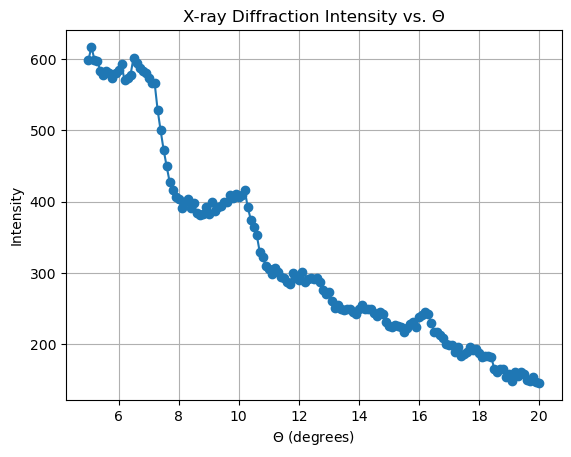

In [3]:
# Visualize the data
plt.plot(data['Theta'], data['Intensity'], marker='o')
plt.xlabel(r'$\Theta$ (degrees)')
plt.ylabel('Intensity')
plt.title('X-ray Diffraction Intensity vs. Θ')
plt.grid(True)
plt.show()

In [4]:
# Linear background subtraction
# Assuming a linear background model: Intensity = a * Theta + b
# Fit a linear model to the data
linear_fit = np.polyfit(data['Theta'], data['Intensity'], 1)
linear_background = np.polyval(linear_fit, data['Theta'])

# Subtract the linear background
data['Intensity_linear_subtracted'] = data['Intensity'] - linear_background

# Exponential background subtraction
# Assuming an exponential background model: Intensity = a * exp(b * Theta)
# Fit an exponential model to the data

def exponential_model(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exponential_model, data['Theta'], data['Intensity'])
exponential_background = exponential_model(data['Theta'], *params)

# Subtract the exponential background
data['Intensity_exponential_subtracted'] = data['Intensity'] - exponential_background

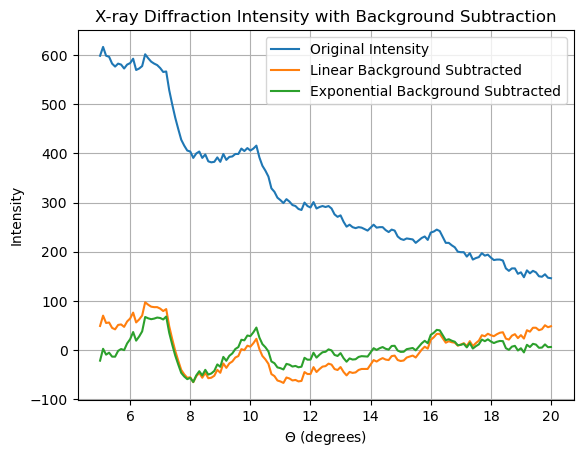

In [5]:
# Plot the original data
plt.plot(data['Theta'], data['Intensity'], label='Original Intensity')

# Plot the linear background subtracted data
plt.plot(data['Theta'], data['Intensity_linear_subtracted'], label='Linear Background Subtracted')

# Plot the exponential background subtracted data
plt.plot(data['Theta'], data['Intensity_exponential_subtracted'], label='Exponential Background Subtracted')

# Add labels and title
plt.xlabel(r'$\Theta$ (degrees)')
plt.ylabel('Intensity')
plt.title('X-ray Diffraction Intensity with Background Subtraction')
plt.legend()
plt.grid(True)
plt.show()

Detected peaks at Theta values: [ 5.1  6.5 10.2 16.3 17.3 18.4 19.8]
FWHMs of the detected peaks: [13.3, 15.0, 6.9, 6.6, 0.5, 1.3000000000000007, 3.799999999999997]


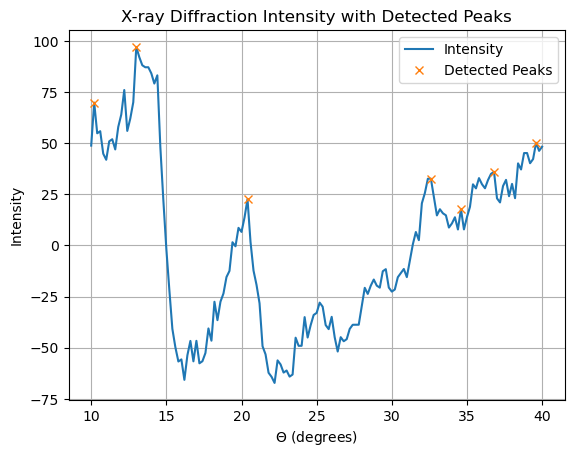

In [7]:
from scipy.signal import find_peaks

# Detect peaks in the intensity data
peaks, properties = find_peaks(data['Intensity_linear_subtracted'], height=10, distance=10)

# Calculate FWHM for each peak
fwhms = []
for peak in peaks:
    half_max = data['Intensity_linear_subtracted'][peak] / 2
    left_idx = (np.abs(data['Intensity_linear_subtracted'][:peak] - half_max)).argmin()
    right_idx = (np.abs(data['Intensity_linear_subtracted'][peak:] - half_max)).argmin() + peak
    fwhm = data['Theta'][right_idx] - data['Theta'][left_idx]
    fwhms.append(fwhm)

# Print the detected peaks and their FWHMs
print("Detected peaks at Theta values:", data['Theta'][peaks].values)
print("FWHMs of the detected peaks:", fwhms)

# Plot the data with detected peaks
plt.plot(2*data['Theta'], data['Intensity_linear_subtracted'], label='Intensity')
plt.plot(2*data['Theta'][peaks], data['Intensity_linear_subtracted'][peaks], 'x', label='Detected Peaks')
plt.xlabel(r'$\Theta$ (degrees)')
plt.ylabel('Intensity')
plt.title('X-ray Diffraction Intensity with Detected Peaks')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Calculate the ratio sin^2(Theta) / sin^2(Theta_min)
ratios = sin_squared_theta / sin_squared_min

# Display the calculated ratios
print("Ratios of sin^2(Theta) to sin^2(Theta_min):", ratios)

Ratios of sin^2(Theta) to sin^2(Theta_min): [1.         1.20503494 1.42897656 1.621697  ]
